In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
df=pd.read_excel("australia.new.xlsx",sheet_name="Australiaa")
df

,Date,Country/Territory/Area,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-23,Australia,12,0,0,12,10
1,2020-02-19,Australia,12,0,0,12,3
2,2020-02-15,Australia,12,0,0,12,3
3,2020-02-11,Australia,12,0,0,15,0
4,2020-02-07,Australia,12,0,0,15,0
...,...,...,...,...,...,...,...
149,2020-02-19,Vietnam,16,0,0,8,8
150,2020-02-15,Vietnam,16,0,0,8,8
151,2020-02-11,Vietnam,15,1,0,8,6
152,2020-02-07,Vietnam,12,0,0,7,5


In [5]:
df=df.groupby(df['Date']).sum()
df

,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
Date,,,,,
2020-02-03,153,6,1,123,24
2020-02-07,267,66,1,150,54
2020-02-11,392,146,1,165,84
2020-02-15,523,229,2,170,127
2020-02-19,921,570,3,174,180
2020-02-23,1759,965,17,178,626


In [6]:
df.reset_index()

,Date,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-03,153,6,1,123,24
1,2020-02-07,267,66,1,150,54
2,2020-02-11,392,146,1,165,84
3,2020-02-15,523,229,2,170,127
4,2020-02-19,921,570,3,174,180
5,2020-02-23,1759,965,17,178,626


In [7]:
day=pd.Series([1,2,3,4,5,6])

In [8]:
df.set_index(day)

,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
1,153,6,1,123,24
2,267,66,1,150,54
3,392,146,1,165,84
4,523,229,2,170,127
5,921,570,3,174,180
6,1759,965,17,178,626


In [9]:
cases=df['Confirmed Cases']

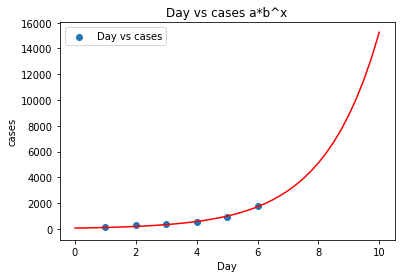

In [10]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day,cases, p0=[1, 1e-6])


x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs cases')
plt.title("Day vs cases a*b^x")
plt.xlabel('Day')
plt.ylabel('cases')
plt.legend()
plt.show()

In [11]:
a=popt[0].round(4)
b=popt[1].round(4)
a

65.0386

In [12]:
b

1.726

In [13]:
print(f'The equation of regression line is y={a}*{b}^x')

The equation of regression line is y=65.0386*1.726^x


In [14]:
y_plot=func3(x_plot,*popt)

In [15]:
y_plot

array([   65.03863469,    74.5469214 ,    85.44526675,    97.93688959,
         112.25471822,   128.66573377,   147.47594853,   169.03611209,
         193.74825167,   222.07316862,   254.53903092,   291.75122175,
         334.40362793,   383.29157871,   439.32667603,   503.55379296,
         577.17055722,   661.54968303,   758.2645678 ,   869.11863088,
         996.17894153,  1141.81476302,  1308.74173171,  1500.07249495,
        1719.37475178,  1970.73777902,  2258.848683  ,  2589.07979896,
        2967.58886764,  3401.43385727,  3898.70457177,  4468.67349939,
        5121.96871462,  5870.77205734,  6729.04628464,  7712.7954311 ,
        8840.36323213, 10132.77517524, 11614.1305573 , 13312.05185838,
       15258.1998115 ])

In [16]:
expALLDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [17]:
expALLDf.to_csv(r'australia.final.csv')